In [72]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#DATASSET
df = pd.read_csv('cancer.csv')

In [74]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [77]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [78]:
df.diagnosis.value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

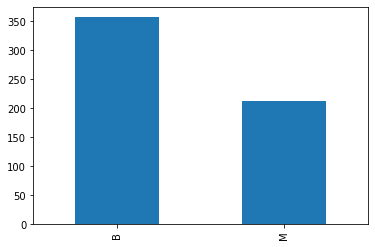

In [79]:
df.diagnosis.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1357e92e8>,
      dtype=object)

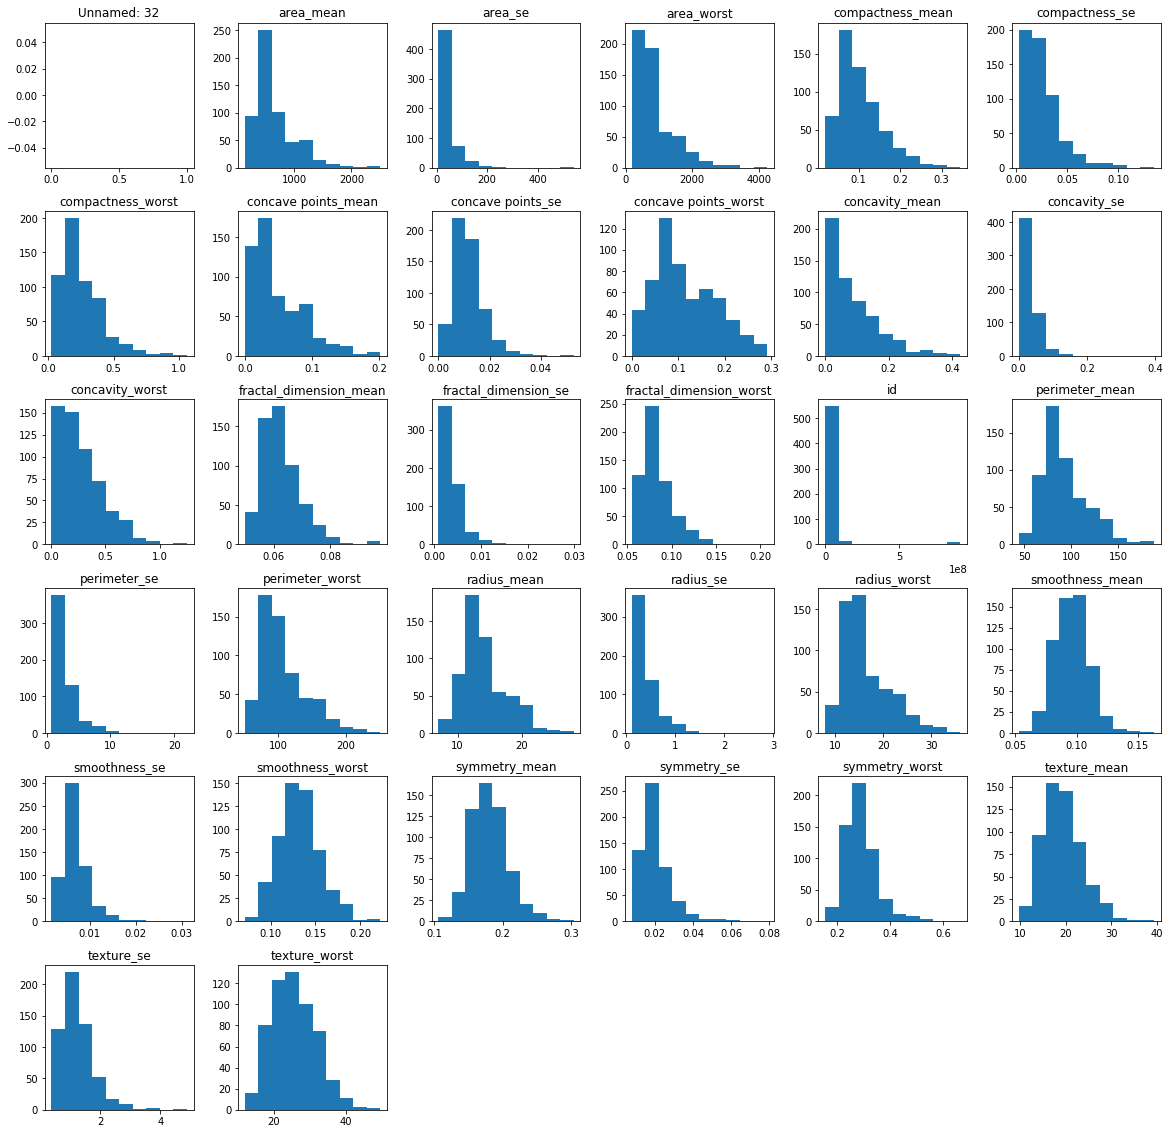

In [80]:
df.hist(bins=10,figsize=(20,20),grid=False)

In [81]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [82]:
cancer_mapping = {'B':0, 'M':1}
df.diagnosis=df.diagnosis.map(cancer_mapping)

In [83]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [84]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [85]:
#df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [86]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [87]:
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

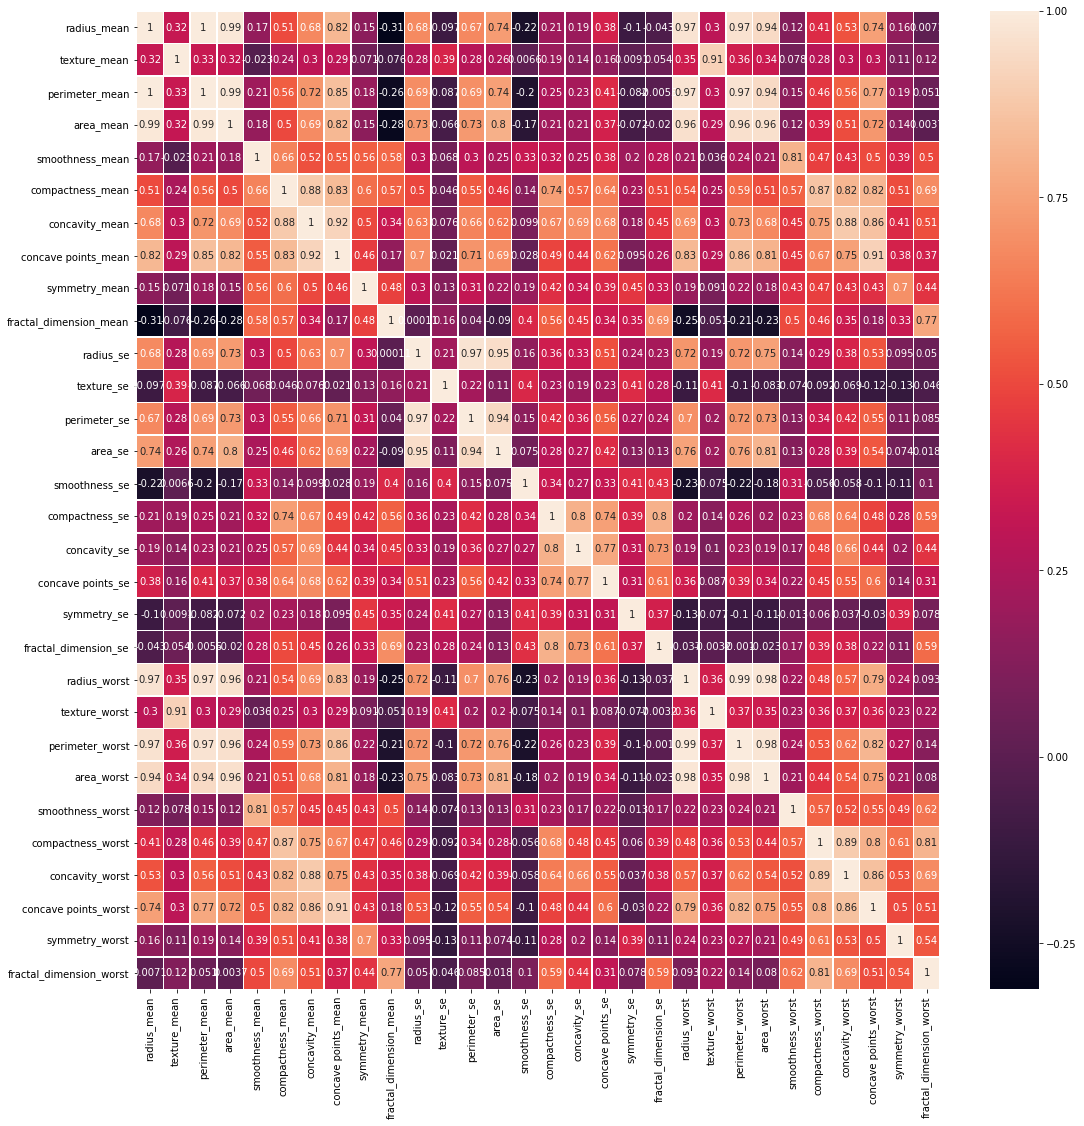

In [88]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidth=.5)


In [89]:
#high correlation,threshold=90% , 0.90
high_corr_pts=X[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst']]

Text(0.5, 1.0, 'Radius mean w.r.t Diagnosis')

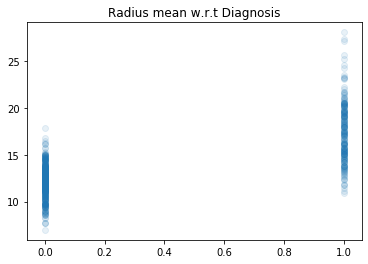

In [90]:
#for transparent plot,we need low alpha value
plt.scatter(df.diagnosis,df.radius_mean,alpha=0.1)
plt.title('Radius mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Perimeter mean w.r.t Diagnosis')

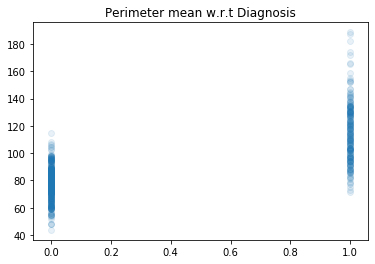

In [91]:
plt.scatter(df.diagnosis,df.perimeter_mean,alpha=0.1)
plt.title('Perimeter mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Area mean w.r.t Diagnosis')

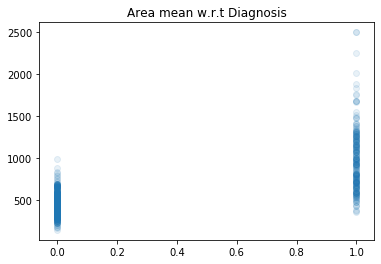

In [92]:
plt.scatter(df.diagnosis,df.area_mean,alpha=0.1)
plt.title('Area mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Perimeter worst w.r.t Diagnosis')

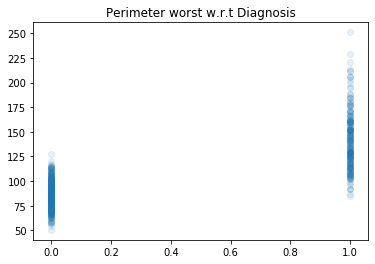

In [93]:
plt.scatter(df.diagnosis,df.perimeter_worst,alpha=0.1)
plt.title('Perimeter worst w.r.t Diagnosis')

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

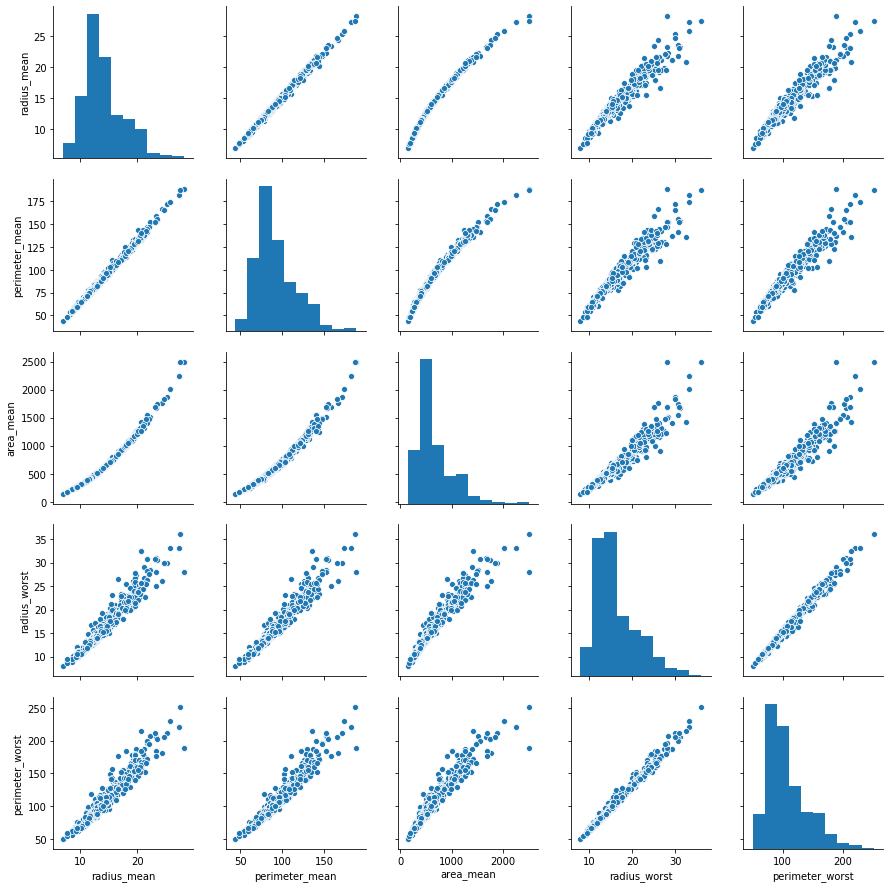

In [95]:
sns.pairplot(high_corr_pts)

In [114]:
import xgboost as xgb

In [97]:
model_all = xgb.XGBClassifier()

In [98]:
model_all.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
pred=model_all.predict(X_test)

In [100]:
accuracy_score(y_test,pred)

0.9370629370629371

In [101]:
confusion_matrix(y_test,pred)

array([[81,  7],
       [ 2, 53]])

In [102]:
from sklearn.feature_selection import RFECV

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
#Fitting SVM
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train) 
accuracy=classifier.score(X_test, y_test)*100

print(accuracy)
#0.972 Acuracy

97.2027972027972


In [105]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)*100

print(accuracy)
#95.1 Acuracy

95.1048951048951


In [117]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)*100

print(accuracy)
#98.6 Acuracy


98.6013986013986


In [107]:
#Fitting K-SVM
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)*100

print(accuracy)
#96.5 Acuracy

96.5034965034965


In [108]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)*100

print(accuracy)
#95.8 Acuracy

95.8041958041958


In [109]:
#from tkinter import *
#from PIL import Image,ImageTk
#import cv2

#root=Tk()


#root.title("Breast Cancer Detection")
#root.geometry("800x800") 

#Label1
#label1=Label(root,text="Select the Machine Learning Algorithm",width=35,font="Helvetica 20 bold")
#label1.grid(row=0,sticky=W,padx=10,pady=20) #col=0


#label2=Label(root,text="Select the Model",width=35,font="Helvetica 20 bold")
#label2.grid(row=0,column=1,pady=20)

#Label2
#var2=StringVar()
#label3=Label(root,textvariable=var2)
#label3.grid(row=3,column=1)

#Image of Results
#image=Image.open("cancer_awareness.png")
#resized=image.resize((700,500),Image.ANTIALIAS)
#photo=ImageTk.PhotoImage(resized)
#label=Label(root,image=photo)
#label.image=photo
#label.grid(row=20,columnspan=4,sticky=W,padx=10,pady=10)

#mb_var=StringVar()
#mb_var.set("Model Selection")
#mb=OptionMenu(root,mb_var,())
#mb.configure(width=20)
#mb.grid(row=1,column=1)


#def reset_option_menu(options,index=None):
    
   # menu=mb["menu"]
   # menu.delete(0,"end")
   # for string in options:
    #    menu.add_command(label=string,command=lambda value=string:mb_var.set(value))
    #if index is not None:
     #   mb_var.set(options[index])

#def a():
 #   reset_option_menu(["SVM","KNN","Random Forest Tree","K-SVM","Decision Tree"],0)
    
#def default():
 #   reset_option_menu([""],0)

#def c():
 #   var="The Selected Model is "+mb_var.get()
  #  var2.set(var)
    
#def d():
 #   var=mb_var.get()

  #  if var == "SVM":
    
   #     image1=Image.open("SVM.png")
    #    resized=image1.resize((700,500),Image.ANTIALIAS)
     #   photo1=ImageTk.PhotoImage(resized)
      #  label.configure(image=photo1)
       # label.image=photo1
        
    
   # elif var == "KNN":
    #    image2=Image.open("KNN.png")
     #   resized=image2.resize((700,500),Image.ANTIALIAS)
      #  photo2=ImageTk.PhotoImage(resized)
      #  label.configure(image=photo2)
      #  label.image=photo2
    
    #elif var == "Random Forest Tree":
     #   image3=Image.open("Random_Forest_Tree.png")
      #  resized=image3.resize((700,500),Image.ANTIALIAS)
      #  photo3=ImageTk.PhotoImage(resized)
      #  label.configure(image=photo3)
      #  label.image=photo3
    
    
    #elif var == "K-SVM":
     #   image4=Image.open("K-SVM.png")
     #   resized=image4.resize((700,500),Image.ANTIALIAS)
     #   photo4=ImageTk.PhotoImage(resized)
     #   label.configure(image=photo4)
     #   label.image=photo4
    
   # elif var == "Decision Tree":
    #    image5=Image.open("Decision_Tree.png")
    #    resized=image5.resize((700,500),Image.ANTIALIAS)
    #    photo5=ImageTk.PhotoImage(resized)
    #    label.configure(image=photo5)
    #    label.image=photo5
    


#Radio Button
#var1=IntVar()
#R1=Radiobutton(root,text="Supervised Learning",variable=var1,value=1,command=a)
#R1.grid(row=1,sticky=W,padx=20)

#default()

#B=Button(root,text="Set Model",font="Helvetica 14",relief=RAISED,command=c)
#B.grid(row=3,sticky=W,padx=10,pady=10)

#B=Button(root,text="Calculate Result",font="Helvetica 14",relief=RAISED,command=d)
#B.grid(row=4,column=1,sticky=W,padx=10,pady=10)

#var2=IntVar()
#r1=Radiobutton(root,text="Wisconsin Dataset",variable=var2,value=3,command=e)


#root.mainloop()

In [ ]:
#import statements
from tkinter import * 
import tkinter as tk
import tkinter.messagebox
from tkinter import font
from PIL import ImageTk,Image
import cv2
import pandas as pd

acc=0
root = Tk()

root.title("Breast Cancer Detection")
root.geometry('800x800')
label1=Label(root,text='Select the Machine Learning Algorithm and Dataset',width=45,font="Helvetica 20 bold")
label1.grid(column=0,row=0)

label2=Label(root,text='Select the Model',width=35,font="Helvetica 20 bold")
label2.grid(column=5,columnspan=50,sticky=NE)
mb_var=StringVar()
mb_var.set("Model Selection")
mb=OptionMenu(root,mb_var,())
mb.configure(width=20)
mb.grid(column=5,columnspan=33,sticky=NE,padx=10,pady=10)


#B1=Button(root,text="Set Model",font="Helvetica 14",relief=RAISED,command=c)
#B1.grid(sticky=E,columnspan=20,column=5,row=5,padx=10,pady=10)

#B2=Button(root,text="Calculate Result",font="Helvetica 14",relief=RAISED,command=d)
#B2.grid(sticky=E,columnspan=37,column=10,row=5,padx=10,pady=10)    
#Accuracy=str()        
#Accuracy_label=Label(root,text=Accuracy,width=35,font='Times 22')
#Accuracy_label.grid(column=5,columnspan=50,sticky=NE)
#Accuracy_label=Label(root,text=Accuracy,width=55,font='Times 22')
#Accuracy.grid(column=5,columnspan=50,sticky=NE)
tkvar = StringVar(root)
# Dictionary with options
choices = { 'Wisconsin','Any other'}
tkvar.set('Wisconsin') # set the default option

popupMenu = OptionMenu(root, tkvar, *choices)
Label(root, text="Choose a Dataset",font="Helvetica 20 bold").grid(row = 1, column = 1)
popupMenu.grid(row = 2, column =1)

# on change dropdown value
def change_dropdown(*args):
    print( tkvar.get() )

# link function to change dropdown
tkvar.trace('w', change_dropdown)


image = Image.open("cancer_awareness.png")
photo = ImageTk.PhotoImage(image,master=root)
label = tk.Label(root, image=photo)
label.image = photo
label.grid()

def reset_option_menu(options,index=None):
    
 menu=mb["menu"]
 menu.delete(0,"end")
 for string in options:
    menu.add_command(label=string,command=lambda value=string:mb_var.set(value))
 if index is not None:
     mb_var.set(options[index])

def a():
    reset_option_menu(["SVM","KNN","Random Forest Tree","K-SVM","Decision Tree"],0)
    
def default():
    reset_option_menu([""],0)

def c():
    var="The Selected Model is "+mb_var.get()
    var2.set(var)
    
    

def d():
        
    var=mb_var.get()

    if var == "SVM":
        
        image1=Image.open("SVM.png")
        resized=image1.resize((700,500),Image.ANTIALIAS)
        photo1=ImageTk.PhotoImage(resized)
        label.configure(image=photo1)
        label.image=photo1
        Accuracy_label=Label(root,text=" ",font='Times 22')
        Accuracy_label.grid(row=3,rowspan=10,columnspan=30,column=10,sticky=NE,padx=10,pady=20)
        #Accuracy.set('Accuracy: 0.972027972027972 ')
        #Accuracy_label=Label(root,text="Accuracy: 0.972027972027972",width=35,font='Times 22')
        #print("Accuracy: 0.972027972027972")
        #Accuracy_label.pack()
        #Accuracy_label.grid(column=5,columnspan=50,sticky=NE
        acc=pd.read_csv('accuracy.csv')
        accuracy=acc['SVM'][0]
        j='Accuracy is: ' + str(accuracy)
        Accuracy_label.config(text=j)
    
    elif var == "KNN":
        image2=Image.open("KNN.png")
        resized=image2.resize((700,500),Image.ANTIALIAS)
        photo2=ImageTk.PhotoImage(resized)
        label.configure(image=photo2)
        label.image=photo2
        #Accuracy.set('Accuracy: 0.951048951048951 ')
        #Accuracy_label=Label(root,text=Accuracy,width=55,font='Times 22')
        #Accuracy_label.grid(column=5,columnspan=50,sticky=NE)
        Accuracy_label=Label(root,text=" ",font='Times 22')
        Accuracy_label.grid(row=3,rowspan=10,columnspan=30,column=10,sticky=NE,padx=10,pady=20)
        acc=pd.read_csv('accuracy.csv')
        accuracy=acc['KNN'][0]
        j='Accuracy is: ' + str(accuracy)
        Accuracy_label.config(text=j)
        
        
    elif var == "Random Forest Tree":
        image3=Image.open("Random_Forest_Tree.png")
        resized=image3.resize((700,500),Image.ANTIALIAS)
        photo3=ImageTk.PhotoImage(resized)
        label.configure(image=photo3)
        label.image=photo3
        #Accuracy.set('Accuracy: 0.986013986013986 ')
        #Accuracy_label=Label(root,text=Accuracy,width=55,font='Times 22')
        #Accuracy_label.grid(column=5,columnspan=50,sticky=NE)
        Accuracy_label=Label(root,text=" ",font='Times 22')
        Accuracy_label.grid(row=3,rowspan=10,columnspan=30,column=10,sticky=NE,padx=10,pady=20)
        acc=pd.read_csv('accuracy.csv')
        accuracy=acc['Random_Forest_Tree'][0]
        j='Accuracy is: ' + str(accuracy)
        Accuracy_label.config(text=j)
        
        
    elif var == "K-SVM":
        image4=Image.open("K-SVM.png")
        resized=image4.resize((700,500),Image.ANTIALIAS)
        photo4=ImageTk.PhotoImage(resized)
        label.configure(image=photo4)
        label.image=photo4
        #Accuracy.set('Accuracy: 0.965034965034965 ')
        #Accuracy_label=Label(root,text=Accuracy,width=55,font='Times 22')
        #Accuracy_label.grid(column=5,columnspan=50,sticky=NE)
        Accuracy_label=Label(root,text=" ",font='Times 22')
        Accuracy_label.grid(row=3,rowspan=10,columnspan=30,column=10,sticky=NE,padx=10,pady=20)
        acc=pd.read_csv('accuracy.csv')
        accuracy=acc['K_SVM'][0]
        j='Accuracy is: ' + str(accuracy)
        Accuracy_label.config(text=j)
        
        
        
    elif var == "Decision Tree":
        image5=Image.open("Decision_Tree.png")
        resized=image5.resize((700,500),Image.ANTIALIAS)
        photo5=ImageTk.PhotoImage(resized)
        label.configure(image=photo5)
        label.image=photo5
        #Accuracy.set('Accuracy: 0.958041958041958 ')
        #Accuracy_label=Label(root,text=Accuracy,width=55,font='Times 22')
        #Accuracy_label.grid(column=5,columnspan=50,sticky=NE)
        Accuracy_label=Label(root,text=" ",font='Times 22')
        Accuracy_label.grid(row=3,rowspan=10,columnspan=30,column=10,sticky=NE,padx=10,pady=20)
        acc=pd.read_csv('accuracy.csv')
        accuracy=acc['Decision_Tree'][0]
        j='Accuracy is: ' + str(accuracy)
        Accuracy_label.config(text=j)
        
        
        
B1=Button(root,text="Set Model",font="Helvetica 14",relief=RAISED,command=c)
B1.grid(sticky=E,columnspan=20,column=5,row=5,padx=10,pady=10)

B2=Button(root,text="Calculate Result",font="Helvetica 14",relief=RAISED,command=d)
B2.grid(sticky=E,columnspan=37,column=10,row=5,padx=10,pady=10)    
        
#Radio Button
var1=IntVar()
R1=Radiobutton(root,text="Supervised Learning",variable=var1,value=1,command=a)
R1.grid(sticky=NW,column=0,row=1,padx=20,pady=10) 

var2=IntVar()
R2=Radiobutton(root,text="Wisconsin Dataset",variable=var2,value=1,command=a)
#R2.grid(sticky=NW,column=0,row=2,padx=20,pady=10) 

       
#def acc():
#    if var=="SVM":
#        Accuracy=0.972027972027972
#        string_to_display="Accuracy is: " + Accuracy
#        var_accuracy.set(string_to_display)
#var_accuracy=IntVar()        
#button_accuracy=Button(root,text="Accuracy is: ",command=acc)
#Accuracy_label=Label(root,text=var_accuracy,width=55,font='Times 22')
#Accuracy_label.grid()






root.mainloop()



In [ ]:
#Position a widget in the parent widget in a grid. Use as options:
#column=number - use cell identified with given column (starting with 0)
#columnspan=number - this widget will span several columns
#in=master - use master to contain this widget
#in_=master - see 'in' option description
#ipadx=amount - add internal padding in x direction
#ipady=amount - add internal padding in y direction
#padx=amount - add padding in x direction
#pady=amount - add padding in y direction
#row=number - use cell identified with given row (starting with 0)
#rowspan=number - this widget will span several rows
#sticky=NSEW - if cell is larger on which sides will this
             # widget stick to the cell boundary

In [107]:
#from tkinter import *
#from PIL import Image,ImageTk
#import cv2

#root=Tk()


#root.title("Breast Cancer Detection")
#root.geometry("800x800") 

#labelaccuracy
#label_Accuarcy=Label(root,text="",width=25,font="Helvetica 20 bold")
#label_Accuarcy.grid(row=20,column=500,sticky=W,padx=10,pady=10)

#Label1
#var=StringVar()
#label1=Label(root,textvariable=var,width=35,font="Helvetica 20 bold")
#var.set("Select the Machine Learning Algorithm")
#label1.grid(row=0,sticky=W,padx=10,pady=20) #col=0

#var=StringVar()
#label2=Label(root,textvariable=var,width=35,font="Helvetica 20 bold")
#var.set("Select the Model")
#label2.grid(row=0,column=1,pady=20)

#Label2
#var2=StringVar()
#label3=Label(root,textvariable=var2)
#label3.grid(row=3,column=1)

#Image of Results
#image=Image.open("cancer_awareness.png")
#resized=image.resize((700,500),Image.ANTIALIAS)
#photo=ImageTk.PhotoImage(resized)
#label=Label(root,image=photo)
#label.image=photo
#label.grid(row=20,columnspan=4,sticky=W,padx=10,pady=10)

#mb_var=StringVar()
#mb_var.set("Model Selection")
#mb=OptionMenu(root,mb_var,())
#mb.configure(width=20)
#mb.grid(row=1,column=1)

#def reset_option_menu(options,index=None):
    
# menu=mb["menu"]
# menu.delete(0,"end")
# for string in options:
 #   menu.add_command(label=string,command=lambda value=string:mb_var.set(value))
 #if index is not None:
  #  mb_var.set(options[index])

#def a():
 #   reset_option_menu(["SVM","KNN","Random Forest Tree","K-SVM","Decision Tree"],0)
    
#def default():
 #   reset_option_menu([""],0)

#def c():
   # var="The Selected Model is "+mb_var.get()
   # var2.set(var)
    
#def d():
 #   var=mb_var.get()

  #  if var == "SVM":
    
   #     image1=Image.open("SVM.png")
   #     resized=image1.resize((700,500),Image.ANTIALIAS)
   #     photo1=ImageTk.PhotoImage(resized)
   #     label.configure(image=photo1)
    #    label.image=photo1
       # label_Accuarcy.config(text="Accuracy is: ",)
    
    #elif var == "KNN":
    #    image2=Image.open("KNN.png")
    #    resized=image2.resize((700,500),Image.ANTIALIAS)
    #    photo2=ImageTk.PhotoImage(resized)
    #    label.configure(image=photo2)
    #    label.image=photo2
    
   # elif var == "Random Forest Tree":
    #    image3=Image.open("Random_Forest_Tree.png")
    #    resized=image3.resize((700,500),Image.ANTIALIAS)
    #    photo3=ImageTk.PhotoImage(resized)
    #    label.configure(image=photo3)
    #    label.image=photo3
    
    
    #elif var == "K-SVM":
     #   image4=Image.open("K-SVM.png")
     #   resized=image4.resize((700,500),Image.ANTIALIAS)
     #   photo4=ImageTk.PhotoImage(resized)
     #   label.configure(image=photo4)
     #   label.image=photo4
    
    #elif var == "Decision Tree":
      #  image5=Image.open("Decision_Tree.png")
      #  resized=image5.resize((700,500),Image.ANTIALIAS)
      #  photo5=ImageTk.PhotoImage(resized)
      #  label.configure(image=photo5)
      #  label.image=photo5
    


#Radio Button
#var1=IntVar()
#R1=Radiobutton(root,text="Supervised Learning",variable=var1,value=1,command=a)
#R1.grid(row=1,sticky=W,padx=20)

#default()

#B=Button(root,text="Set Model",font="Helvetica 14",relief=RAISED,command=c)
#B.grid(row=3,sticky=W,padx=10,pady=10)

#B=Button(root,text="Calculate Result",font="Helvetica 14",relief=RAISED,command=d)
#B.grid(row=4,column=1,sticky=W,padx=10,pady=10)

#var2=IntVar()
#r1=Radiobutton(root,text="Wisconsin Dataset",variable=var2,value=3,command=e)


#root.mainloop()